In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("train_IoT_Intrusion_Detection.csv")
df

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,3233,0.000000,0.00,46.53,63.36,22.666768,22.666768,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6053.46,562.46,578.00,577.180591,3.472171,572.82,8.364730e+07,9.5,33.975197,4.949597,408.368004,0.03,141.55,Mirai-greip_flood
1,912,0.000000,0.00,45.16,71.64,30.076685,30.076685,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5804.84,486.56,578.00,552.932551,40.071279,557.68,8.365110e+07,9.5,33.204502,56.724539,8981.817205,0.18,141.55,Mirai-greip_flood
2,7005,0.155276,41.75,41.26,70.45,27595.714830,27595.714830,0.0,0,0,0,0,0,0,0,0.06,0.04,0.00,0.06,0.12,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5262.21,289.30,563.03,499.068437,102.663423,499.11,8.358171e+07,9.5,31.277104,145.292553,20348.252270,0.61,141.55,Mirai-greip_flood
3,13669,0.000000,0.00,47.00,64.00,5.858490,5.858490,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.358170e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
4,7895,0.000000,0.00,47.00,64.00,53.647950,53.647950,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.357387e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,16991,0.000000,0.00,46.53,63.36,85.730135,85.730135,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6043.10,552.10,578.00,576.552135,5.944873,572.82,8.358183e+07,9.5,33.956454,8.446526,714.142178,0.05,141.55,Mirai-greip_flood
15596,105,0.000206,5.03,45.11,63.79,76.154515,76.154515,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.02,0.02,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5717.95,414.08,578.00,544.841438,59.952647,553.90,8.358181e+07,9.5,32.955819,84.873484,11402.998320,0.34,141.55,Mirai-greip_flood
15597,16373,0.000000,0.00,47.00,64.00,8.649574,8.649574,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.364726e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
15598,7823,168.243574,21405.50,12.60,78.10,7.730814,7.730814,0.0,0,0,0,0,0,0,0,0.30,0.60,0.00,59.20,122.40,0,0,0,0,0,0,0,0,1,0,0,0,1,1,442.90,46.00,174.80,73.438889,45.394966,85.70,9.608316e-03,5.5,12.012632,64.198177,2985.920739,0.70,38.50,DictionaryBruteForce


In [3]:
df.dtypes

Unnamed: 0           int64
flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number      int64
syn_flag_number      int64
rst_flag_number      int64
psh_flag_number      int64
ack_flag_number      int64
ece_flag_number      int64
cwr_flag_number      int64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP                 int64
HTTPS                int64
DNS                  int64
Telnet               int64
SMTP                 int64
SSH                  int64
IRC                  int64
TCP                  int64
UDP                  int64
DHCP                 int64
ARP                  int64
ICMP                 int64
IPv                  int64
LLC                  int64
Tot sum            float64
Min                float64
Max                float64
A

In [4]:
df['label'] = df['label'].astype("string")
df['label'].dtype

string[python]

In [5]:
df.info()
# All data is filled. Not even a single empty/Unfilled row



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15600 non-null  int64  
 1   flow_duration    15600 non-null  float64
 2   Header_Length    15600 non-null  float64
 3   Protocol Type    15600 non-null  float64
 4   Duration         15600 non-null  float64
 5   Rate             15600 non-null  float64
 6   Srate            15600 non-null  float64
 7   Drate            15600 non-null  float64
 8   fin_flag_number  15600 non-null  int64  
 9   syn_flag_number  15600 non-null  int64  
 10  rst_flag_number  15600 non-null  int64  
 11  psh_flag_number  15600 non-null  int64  
 12  ack_flag_number  15600 non-null  int64  
 13  ece_flag_number  15600 non-null  int64  
 14  cwr_flag_number  15600 non-null  int64  
 15  ack_count        15600 non-null  float64
 16  syn_count        15600 non-null  float64
 17  fin_count   

In [7]:
df.describe()

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,15600.000000,15600.000000,1.560000e+04,15600.000000,15600.000000,1.560000e+04,1.560000e+04,15600.0,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.0,15600.0,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.0,15600.0,15600.000000,15600.0,15600.000000,15600.000000,15600.0,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,1.560000e+04,15600.000000,15600.000000,15600.000000,1.560000e+04,15600.000000,15600.000000
mean,9705.825064,58.735890,2.384301e+04,40.488088,69.431394,9.517368e+03,9.517368e+03,0.0,0.000256,0.013141,0.009359,0.004038,0.096026,0.0,0.0,0.021197,0.145102,0.016298,10.026842,37.683935,0.004487,0.050256,0.001410,0.0,0.0,0.003077,0.0,0.118205,0.010321,0.0,0.000128,0.000256,0.999808,0.999808,5582.034001,461.415288,621.301901,533.241031,53.537958,532.570516,8.334004e+07,9.486565,31.849904,75.617553,3.891505e+04,0.220929,141.203367
std,5631.424944,1056.987013,1.818260e+05,13.525687,19.839338,1.040724e+05,1.040724e+05,0.0,0.016011,0.113882,0.096291,0.063422,0.294636,0.0,0.0,0.119321,0.414126,0.111969,50.826600,196.497841,0.066838,0.218481,0.037528,0.0,0.0,0.055386,0.0,0.322861,0.101068,0.0,0.011322,0.016011,0.013867,0.013867,2076.604330,179.779315,477.786600,199.264840,168.473194,196.501891,3.022726e+07,1.452425,6.806265,238.274419,2.807570e+05,0.301429,37.366598
min,0.000000,0.000000,0.000000e+00,1.570000,2.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,297.000000,42.000000,54.000000,53.732491,0.000000,54.000000,0.000000e+00,1.000000,10.366429,0.000000,0.000000e+00,0.000000,1.000000
25%,4804.500000,0.000000,0.000000e+00,44.890000,64.000000,2.911201e+00,2.911201e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,5870.320000,437.750000,578.000000,558.726554,0.000000,559.560000,8.358152e+07,9.500000,33.355981,0.000000,0.000000e+00,0.000000,141.550000
50%,9673.500000,0.000000,7.800000e-01,46.530000,64.000000,1.277519e+01,1.277519e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,6020.800000,526.200000,578.000000,575.006673,12.341348,572.820000,8.364672e+07,9.500000,33.909245,17.239750,1.302436e+03,0.110000,141.550000
75%,14587.500000,0.029531,1.561250e+01,47.000000,65.910000,4.423948e+01,4.423948e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.010000,0.000000,0.010000,0.050000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,6069.000000,578.000000,578.000000,578.000000,38.181881,578.000000,8.365092e+07,9.500000,34.000000,53.947396,5.706416e+03,0.280000,141.550000
max,19500.000000,51182.926770,8.879658e+06,47.000000,255.000000,2.097152e+06,2.097152e+06,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,2.900000,4.800000,2.800000,1020.800000,6773.880000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,43069.600000,2974.000000,13098.000000,4099.559246,3439.690409,3850.000000,1.666019e+08,13.500000,89.884119,4864.456827,1.334536

In [6]:
df.drop(['Unnamed: 0','Drate','ece_flag_number','cwr_flag_number','Telnet','SMTP','IRC','DHCP'], axis=1, inplace=True)
df
#"Unnamed:0" is timestamps unrelated to our data. Rest of all have all zero entries in the dataset. Dropping all these columns 

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,SSH,TCP,UDP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,46.53,63.36,22.666768,22.666768,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6053.46,562.46,578.00,577.180591,3.472171,572.82,8.364730e+07,9.5,33.975197,4.949597,408.368004,0.03,141.55,Mirai-greip_flood
1,0.000000,0.00,45.16,71.64,30.076685,30.076685,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,5804.84,486.56,578.00,552.932551,40.071279,557.68,8.365110e+07,9.5,33.204502,56.724539,8981.817205,0.18,141.55,Mirai-greip_flood
2,0.155276,41.75,41.26,70.45,27595.714830,27595.714830,0,0,0,0,0,0.06,0.04,0.00,0.06,0.12,0,0,0,0,0,0,0,0,1,1,5262.21,289.30,563.03,499.068437,102.663423,499.11,8.358171e+07,9.5,31.277104,145.292553,20348.252270,0.61,141.55,Mirai-greip_flood
3,0.000000,0.00,47.00,64.00,5.858490,5.858490,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.358170e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
4,0.000000,0.00,47.00,64.00,53.647950,53.647950,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.357387e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,0.000000,0.00,46.53,63.36,85.730135,85.730135,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6043.10,552.10,578.00,576.552135,5.944873,572.82,8.358183e+07,9.5,33.956454,8.446526,714.142178,0.05,141.55,Mirai-greip_flood
15596,0.000206,5.03,45.11,63.79,76.154515,76.154515,0,0,0,0,0,0.00,0.00,0.00,0.02,0.02,0,0,0,0,0,0,0,0,1,1,5717.95,414.08,578.00,544.841438,59.952647,553.90,8.358181e+07,9.5,32.955819,84.873484,11402.998320,0.34,141.55,Mirai-greip_flood
15597,0.000000,0.00,47.00,64.00,8.649574,8.649574,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.364726e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
15598,168.243574,21405.50,12.60,78.10,7.730814,7.730814,0,0,0,0,0,0.30,0.60,0.00,59.20,122.40,0,0,0,0,0,1,0,0,1,1,442.90,46.00,174.80,73.438889,45.394966,85.70,9.608316e-03,5.5,12.012632,64.198177,2985.920739,0.70,38.50,DictionaryBruteForce


## Visualization

<Axes: >

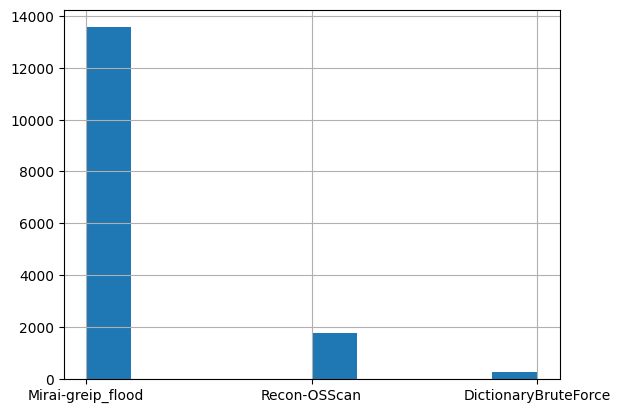

In [9]:
df['label'].hist()
#Maximum Large Scale attacks are of "Mirai-greip_Flood"

<Axes: >

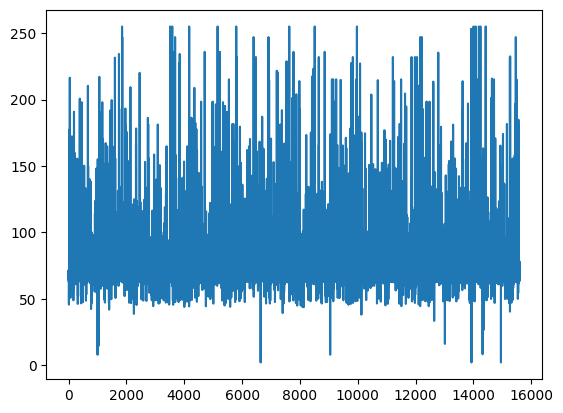

In [10]:
df['Duration'].plot.line()

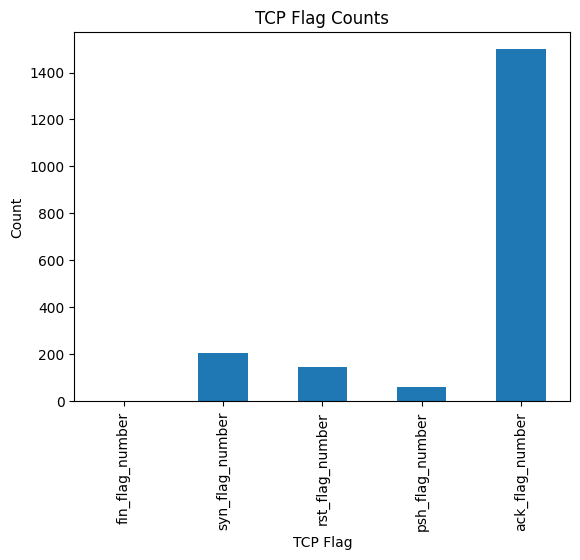

In [11]:

flag_columns = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
                'ack_flag_number']
flag_counts = df[flag_columns].sum()

flag_counts.plot(kind='bar')

plt.xlabel('TCP Flag')
plt.ylabel('Count')
plt.title('TCP Flag Counts')
plt.show()

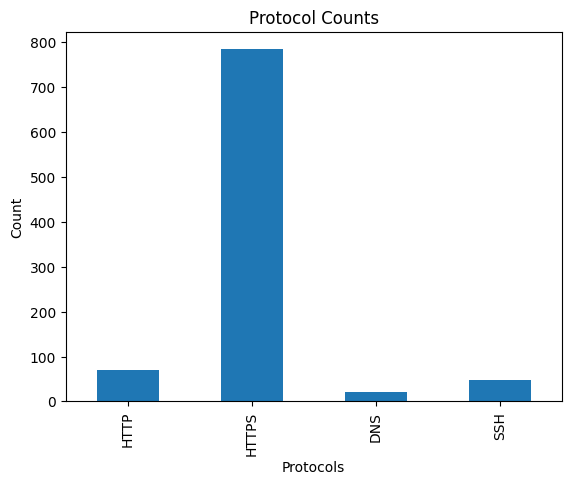

In [12]:
flag_columns = ['HTTP', 'HTTPS', 'DNS','SSH']
flag_counts = df[flag_columns].sum()

flag_counts.plot(kind='bar')

plt.xlabel('Protocols')
plt.ylabel('Count')
plt.title('Protocol Counts')
plt.show()

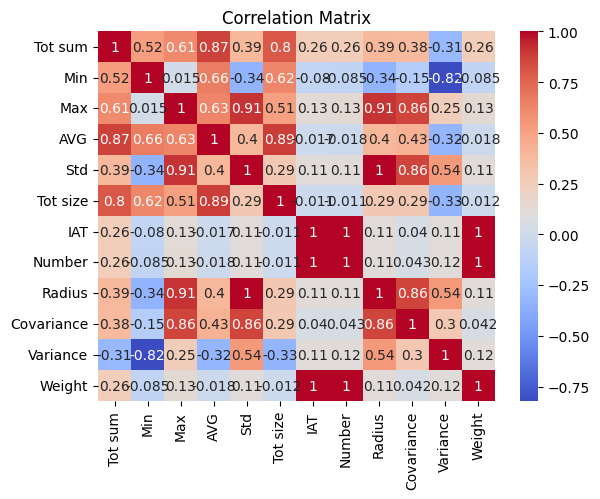

In [13]:
new_df = df[['Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Radius', 'Covariance', 'Variance', 'Weight']]
correlations=new_df.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

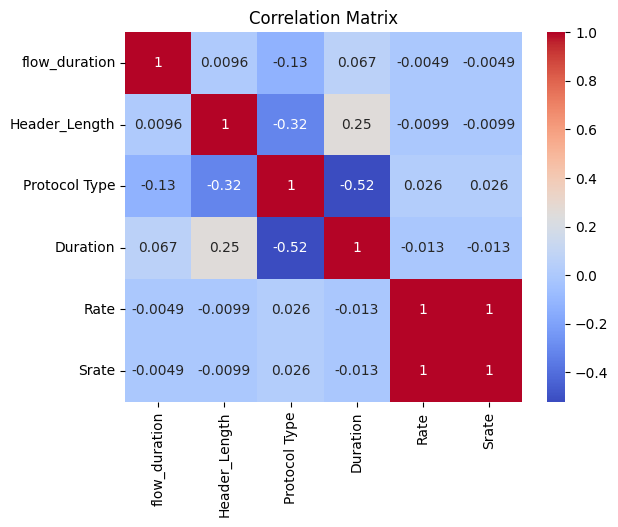

In [14]:
new_df = df[['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate']]
correlations=new_df.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Header_Length'>

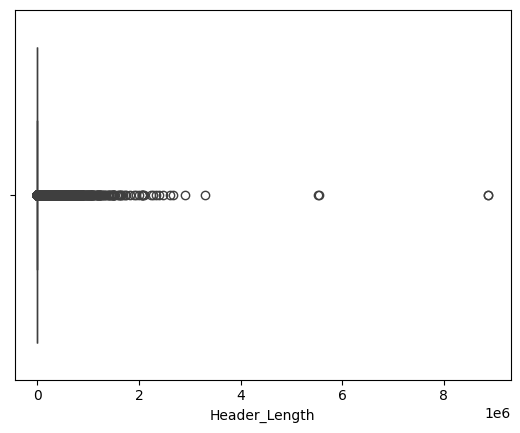

In [15]:
sns.boxplot(x=df['Header_Length'])

In [16]:
df = df[df['Header_Length'] <= 5000000]

<Axes: xlabel='Header_Length'>

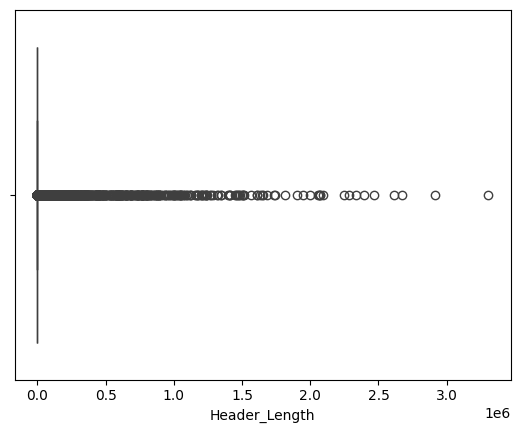

In [17]:
sns.boxplot(x=df['Header_Length'])

In [18]:
df[~(df['Header_Length']>5000000)]
# Outlier Removed

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,SSH,TCP,UDP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,46.53,63.36,22.666768,22.666768,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6053.46,562.46,578.00,577.180591,3.472171,572.82,8.364730e+07,9.5,33.975197,4.949597,408.368004,0.03,141.55,Mirai-greip_flood
1,0.000000,0.00,45.16,71.64,30.076685,30.076685,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,5804.84,486.56,578.00,552.932551,40.071279,557.68,8.365110e+07,9.5,33.204502,56.724539,8981.817205,0.18,141.55,Mirai-greip_flood
2,0.155276,41.75,41.26,70.45,27595.714830,27595.714830,0,0,0,0,0,0.06,0.04,0.00,0.06,0.12,0,0,0,0,0,0,0,0,1,1,5262.21,289.30,563.03,499.068437,102.663423,499.11,8.358171e+07,9.5,31.277104,145.292553,20348.252270,0.61,141.55,Mirai-greip_flood
3,0.000000,0.00,47.00,64.00,5.858490,5.858490,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.358170e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
4,0.000000,0.00,47.00,64.00,53.647950,53.647950,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.357387e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,0.000000,0.00,46.53,63.36,85.730135,85.730135,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6043.10,552.10,578.00,576.552135,5.944873,572.82,8.358183e+07,9.5,33.956454,8.446526,714.142178,0.05,141.55,Mirai-greip_flood
15596,0.000206,5.03,45.11,63.79,76.154515,76.154515,0,0,0,0,0,0.00,0.00,0.00,0.02,0.02,0,0,0,0,0,0,0,0,1,1,5717.95,414.08,578.00,544.841438,59.952647,553.90,8.358181e+07,9.5,32.955819,84.873484,11402.998320,0.34,141.55,Mirai-greip_flood
15597,0.000000,0.00,47.00,64.00,8.649574,8.649574,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.364726e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
15598,168.243574,21405.50,12.60,78.10,7.730814,7.730814,0,0,0,0,0,0.30,0.60,0.00,59.20,122.40,0,0,0,0,0,1,0,0,1,1,442.90,46.00,174.80,73.438889,45.394966,85.70,9.608316e-03,5.5,12.012632,64.198177,2985.920739,0.70,38.50,DictionaryBruteForce


<Axes: xlabel='Protocol Type'>

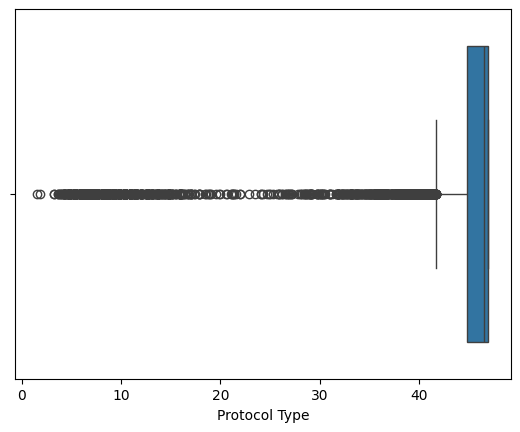

In [19]:
sns.boxplot(x=df['Protocol Type'])


<Axes: xlabel='flow_duration'>

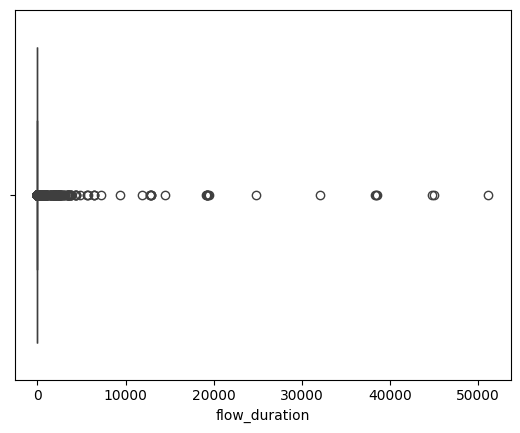

In [20]:
sns.boxplot(x=df['flow_duration'])
#Outliers detected

<Axes: xlabel='flow_duration'>

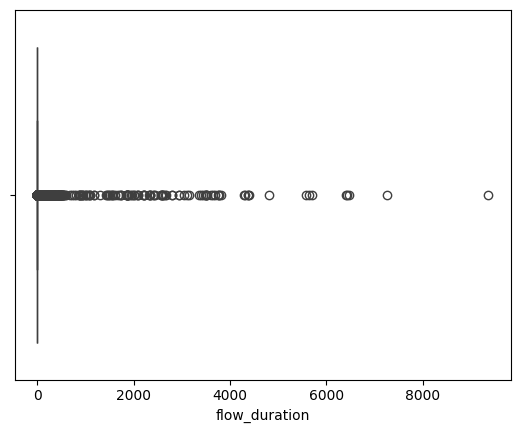

In [8]:
df = df.drop(df[df['flow_duration']>10000].index)
sns.boxplot(x=df['flow_duration'])
#Outliers Removed. Boxplot is balanced

In [11]:
df.drop_duplicates()
#Dropping duplicates (Dropped 3 rows)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,SSH,TCP,UDP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,46.53,63.36,22.666768,22.666768,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6053.46,562.46,578.00,577.180591,3.472171,572.82,8.364730e+07,9.5,33.975197,4.949597,408.368004,0.03,141.55,Mirai-greip_flood
1,0.000000,0.00,45.16,71.64,30.076685,30.076685,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,5804.84,486.56,578.00,552.932551,40.071279,557.68,8.365110e+07,9.5,33.204502,56.724539,8981.817205,0.18,141.55,Mirai-greip_flood
2,0.155276,41.75,41.26,70.45,27595.714830,27595.714830,0,0,0,0,0,0.06,0.04,0.00,0.06,0.12,0,0,0,0,0,0,0,0,1,1,5262.21,289.30,563.03,499.068437,102.663423,499.11,8.358171e+07,9.5,31.277104,145.292553,20348.252270,0.61,141.55,Mirai-greip_flood
3,0.000000,0.00,47.00,64.00,5.858490,5.858490,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.358170e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
4,0.000000,0.00,47.00,64.00,53.647950,53.647950,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,8.357387e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15594,0.000355,3.52,46.40,65.28,90.077919,90.077919,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,5905.12,414.12,573.18,555.126790,46.931760,568.36,8.358179e+07,9.5,33.242768,66.444495,7084.173738,0.33,141.55,Mirai-greip_flood
15595,0.000000,0.00,46.53,63.36,85.730135,85.730135,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6043.10,552.10,578.00,576.552135,5.944873,572.82,8.358183e+07,9.5,33.956454,8.446526,714.142178,0.05,141.55,Mirai-greip_flood
15596,0.000206,5.03,45.11,63.79,76.154515,76.154515,0,0,0,0,0,0.00,0.00,0.00,0.02,0.02,0,0,0,0,0,0,0,0,1,1,5717.95,414.08,578.00,544.841438,59.952647,553.90,8.358181e+07,9.5,32.955819,84.873484,11402.998320,0.34,141.55,Mirai-greip_flood
15598,168.243574,21405.50,12.60,78.10,7.730814,7.730814,0,0,0,0,0,0.30,0.60,0.00,59.20,122.40,0,0,0,0,0,1,0,0,1,1,442.90,46.00,174.80,73.438889,45.394966,85.70,9.608316e-03,5.5,12.012632,64.198177,2985.920739,0.70,38.50,DictionaryBruteForce


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15578 entries, 0 to 15599
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    15578 non-null  float64
 1   Header_Length    15578 non-null  float64
 2   Protocol Type    15578 non-null  float64
 3   Duration         15578 non-null  float64
 4   Rate             15578 non-null  float64
 5   Srate            15578 non-null  float64
 6   fin_flag_number  15578 non-null  int64  
 7   syn_flag_number  15578 non-null  int64  
 8   rst_flag_number  15578 non-null  int64  
 9   psh_flag_number  15578 non-null  int64  
 10  ack_flag_number  15578 non-null  int64  
 11  ack_count        15578 non-null  float64
 12  syn_count        15578 non-null  float64
 13  fin_count        15578 non-null  float64
 14  urg_count        15578 non-null  float64
 15  rst_count        15578 non-null  float64
 16  HTTP             15578 non-null  int64  
 17  HTTPS            

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the label column
df['label'] = label_encoder.fit_transform(df['label'])

# Now, 'label' is numeric (e.g., 0, 1, 2)


In [14]:
# Check the mappings
label_mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mappings)


{'DictionaryBruteForce': np.int64(0), 'Mirai-greip_flood': np.int64(1), 'Recon-OSScan': np.int64(2)}


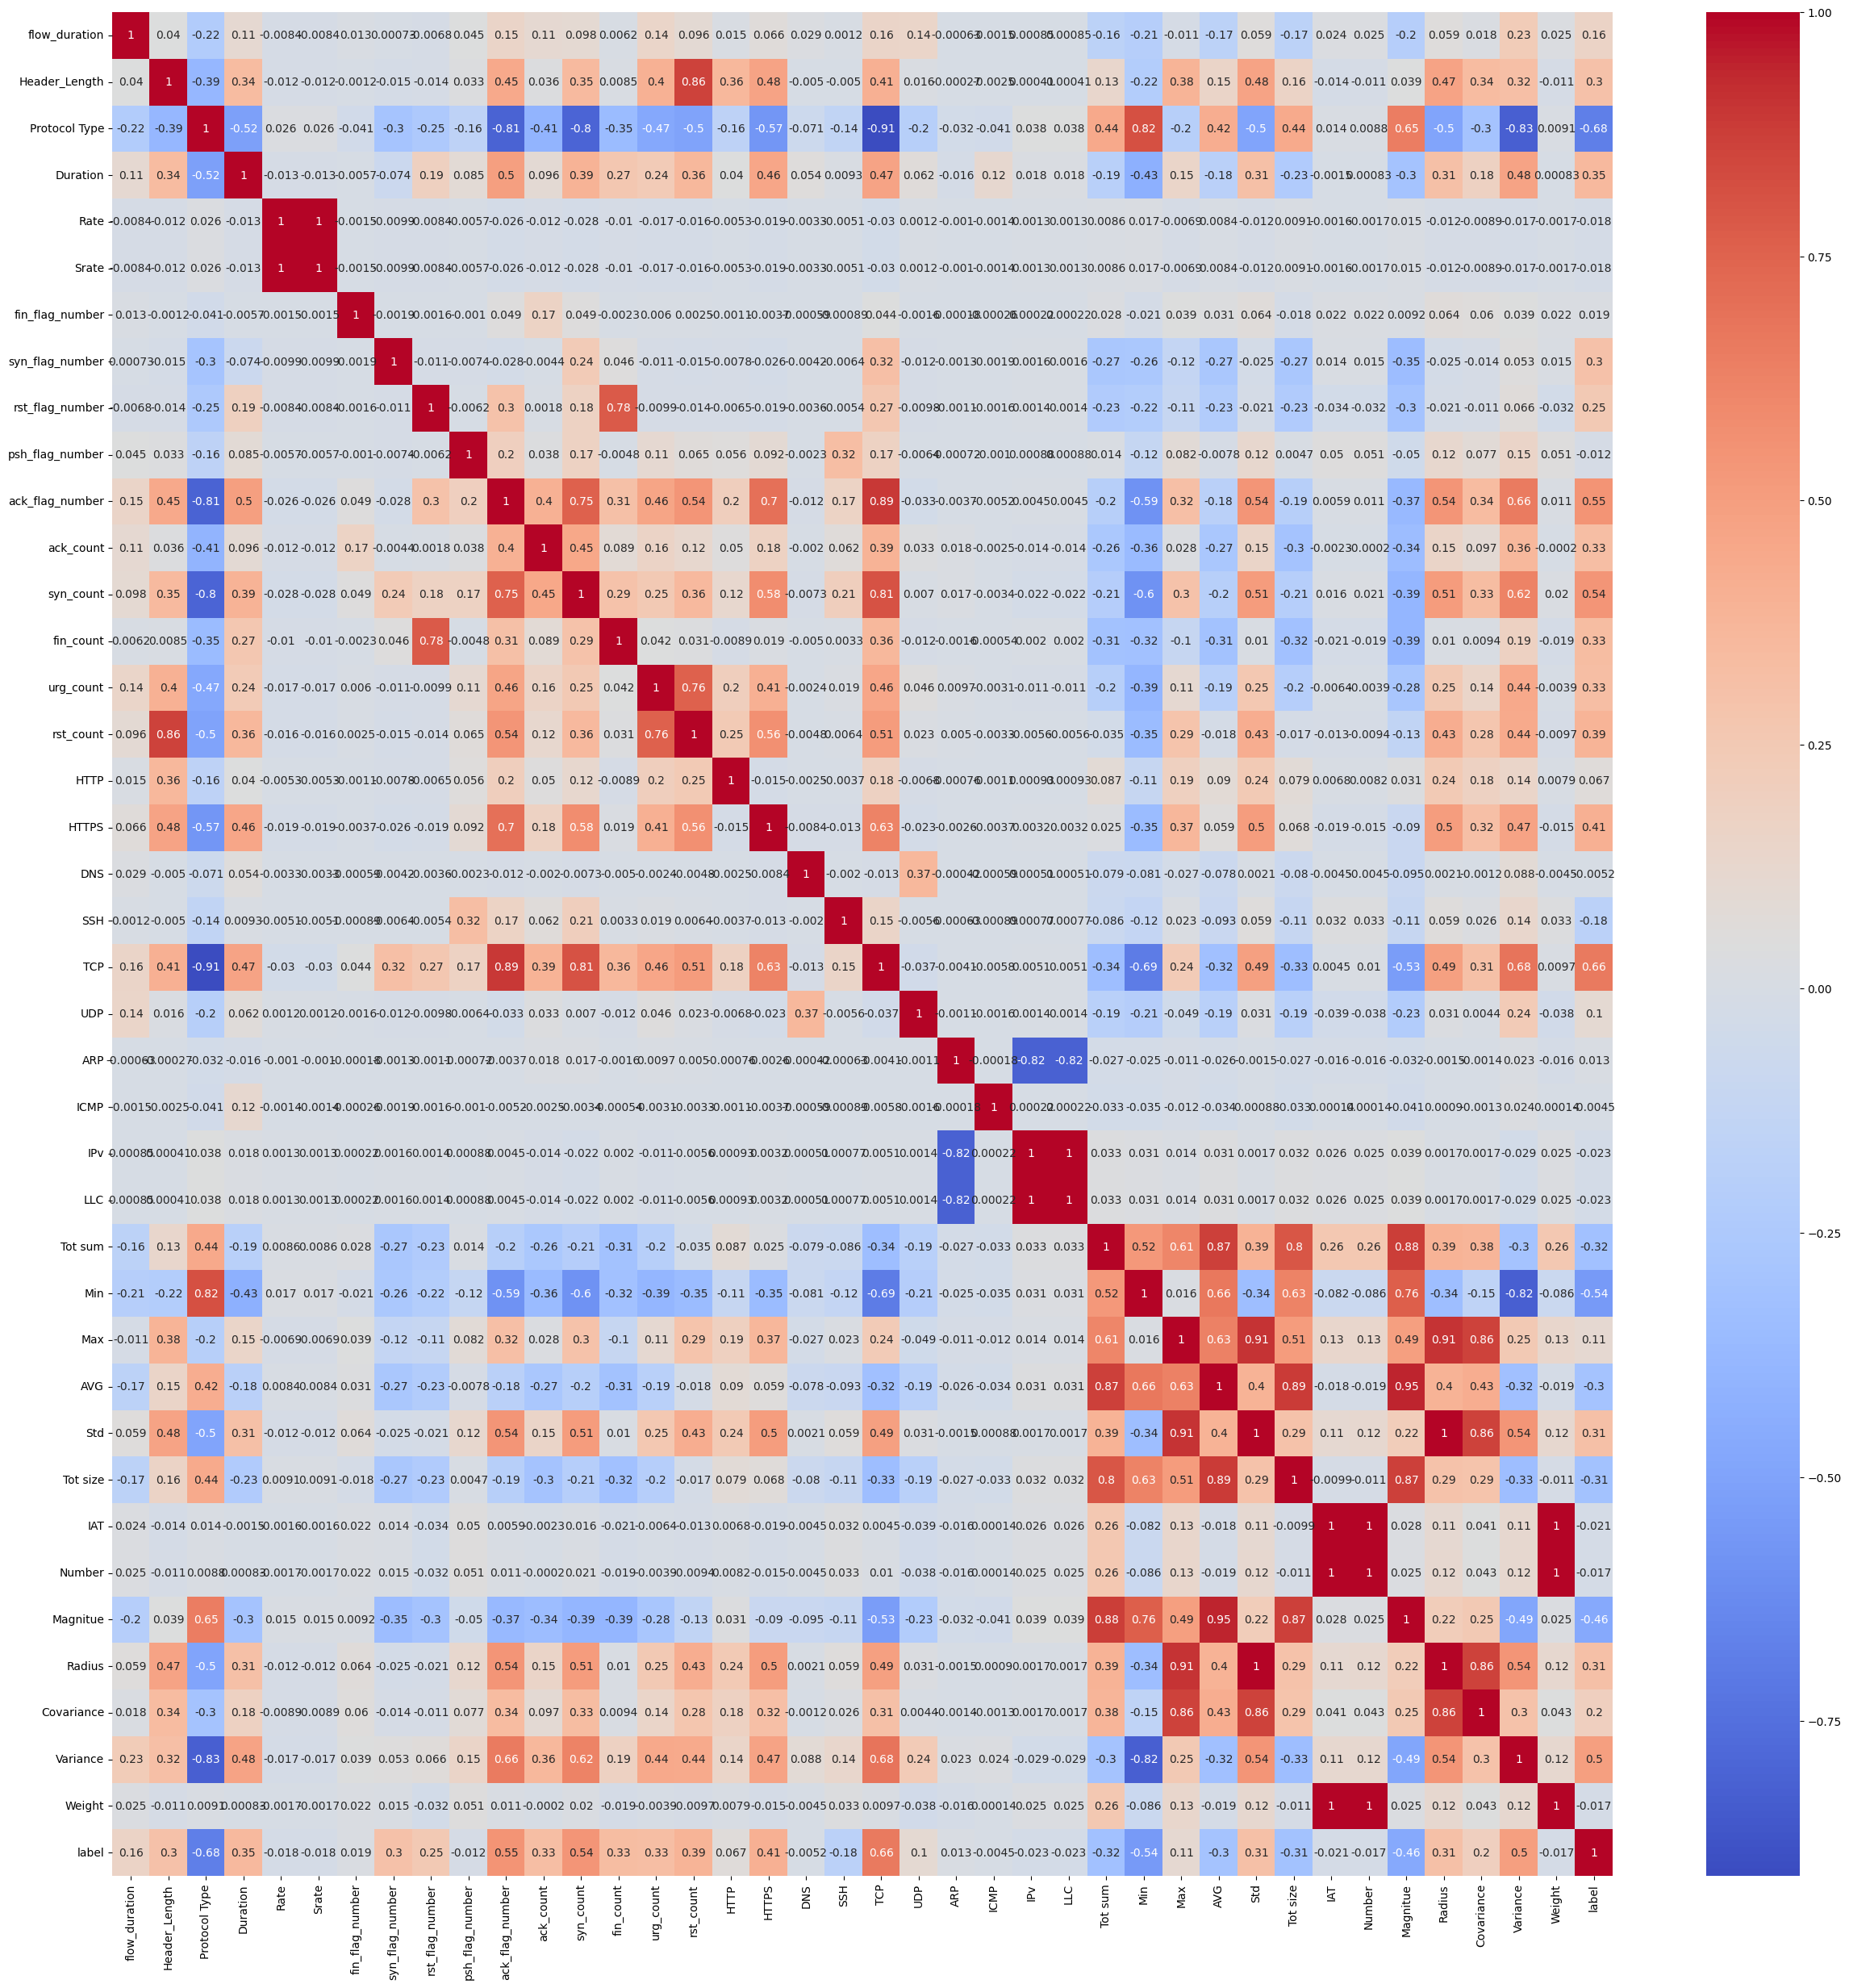

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
df2 = df.copy()


In [16]:
#Removing all column which have correlation of 1 (redundent)
df2.drop(['Srate','LLC','Number','Std','IAT'], axis=1, inplace=True)

In [17]:
#Using threshold of 0.89 as redundent for dataset. removing all columns having correlation >= 0.89
df2.drop(['ack_flag_number','Max','AVG'], axis=1, inplace=True)

Model Classification

In [30]:
df2.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
       'rst_count', 'HTTP', 'HTTPS', 'DNS', 'SSH', 'TCP', 'UDP', 'ARP', 'ICMP',
       'IPv', 'Tot sum', 'Min', 'Tot size', 'Magnitue', 'Radius', 'Covariance',
       'Variance', 'Weight', 'label'],
      dtype='object')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15578 entries, 0 to 15599
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    15578 non-null  float64
 1   Header_Length    15578 non-null  float64
 2   Protocol Type    15578 non-null  float64
 3   Duration         15578 non-null  float64
 4   Rate             15578 non-null  float64
 5   fin_flag_number  15578 non-null  int64  
 6   syn_flag_number  15578 non-null  int64  
 7   rst_flag_number  15578 non-null  int64  
 8   psh_flag_number  15578 non-null  int64  
 9   ack_count        15578 non-null  float64
 10  syn_count        15578 non-null  float64
 11  fin_count        15578 non-null  float64
 12  urg_count        15578 non-null  float64
 13  rst_count        15578 non-null  float64
 14  HTTP             15578 non-null  int64  
 15  HTTPS            15578 non-null  int64  
 16  DNS              15578 non-null  int64  
 17  SSH              

NB CLASSIFIER WITH UNBALANCED CLASSES

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [33]:
X = df2.drop('label', axis=1)  # Features
y = df2['label']              # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = nb_classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8822207958921694
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.98      0.22        49
           1       1.00      0.98      0.99      2683
           2       0.78      0.18      0.29       384

    accuracy                           0.88      3116
   macro avg       0.64      0.71      0.50      3116
weighted avg       0.96      0.88      0.89      3116



In [37]:
df['label'].value_counts()

label
1    13555
2     1761
0      258
Name: count, dtype: int64

In [38]:

with pd.ExcelWriter("DataAnalysis.xlsx") as writer:
    df.to_excel(writer, sheet_name="1A")
    df2.to_excel(writer, sheet_name="1B")

NB CLASSIFIER WITH BALANCED CLASSES USING SMOTE

All values are oversampled to the count of 13555

In [37]:
# %pip install imbalanced-learn 
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load your dataset (replace with your actual data loading method)
# df = pd.read_csv('your_dataset.csv')
X = df2.drop('label', axis=1)  # Features
y = df2['label']              # Target variable

# Example class counts before SMOTE
print("Original class distribution:", Counter(y))

# Define desired counts for classes 0 and 2
desired_count_for_0 = 13555  # or any other desired count based on your needs
desired_count_for_2 = 13555  # match with majority class or set a specific number

# Initialize SMOTE with specified sampling strategy
smote = SMOTE(sampling_strategy={0: desired_count_for_0, 2: desired_count_for_2}, random_state=42)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution after resampling
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({1: 13559, 2: 1761, 0: 258})
Resampled class distribution: Counter({1: 13559, 2: 13555, 0: 13555})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7113351364642242
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.96      0.68      2636
           1       1.00      0.97      0.99      2779
           2       0.82      0.20      0.33      2719

    accuracy                           0.71      8134
   macro avg       0.78      0.71      0.67      8134
weighted avg       0.79      0.71      0.67      8134

